# Air Quality Data Analysis Project

- **Nama:** [Joshua Daniel Talahatu]
- **Email:** [joshuaminex02@gmail.com]
- **ID Dicoding:** [joshua_talahatu_lwZK]


## Defining Business Questions


- Which station has the highest average air pollution level`s?
- How do the average levels of air pollutants (PM2.5, PM10, SO2, NO2, and O3) vary by hour of the day and by month, and what are the safe levels for these pollutants?


## Import Required Libraries


In [1]:
import os
import re
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling


### Gathering Data


In [2]:
data_folder = './data/'
# Pattern to extract the district name that starts with PRSA_Data_ and end with YYYYMMDD-YYYYMMDD.csv

district_pattern = r'PRSA_Data_(.*?)_\d{8}-\d{8}\.csv'
data = {}

for filename in os.listdir(data_folder):
    # Use regex to find a match for the district name in the filename.
    matched_filename = re.search(district_pattern, filename)
    if matched_filename != None:  # If a match is found
        # Read the CSV file into a DataFrame and store it in the dictionary under the district name
        district_data = pd.read_csv(data_folder+filename)
        # Store the DataFrame with the district name as the key
        data[matched_filename.group(1)] = district_data

In [3]:
data['Aotizhongxin'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
data['Changping'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [5]:
data['Dingling'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [6]:
data['Dongsi'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [7]:
data['Guanyuan'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [8]:
data['Gucheng'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [9]:
data['Huairou'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [10]:
data['Nongzhanguan'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [11]:
data['Shunyi'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [12]:
data['Tiantan'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [13]:
data['Wanliu'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [14]:
data['Wanshouxigong'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Insight:**

- Year, month, day, hour provide a timestamp for when air quality data was recorded at specific stations
- The data covers a time range from 1st March 2013 to 28th February 2017, recorded at hourly intervals.
- Particulate Matter (PM2.5 and PM10) concentrations are measured in micrograms per cubic meter (µg/m³), same as SO2 (Sulfur Dioxide), NO2 (Nitrogen Dioxide), and O3 (Ozone)
- Temperature (TEMP) records in celcius (°C) scale
- DEWP (Dew Point), RAIN (Precipitation), wd (Wind Direction), and  WSPM (Wind Speed in m/s) shows how weather conditions affect pollutant levels
- Some recording for pollutants, particularly NO2 and O3, have missing values (NaN)


### Assessing Data


#### Data General Information


In [15]:
data['Aotizhongxin'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [16]:
data['Changping'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [17]:
data['Dingling'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [18]:
data['Dongsi'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [19]:
data['Guanyuan'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [20]:
data['Gucheng'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [21]:
data['Huairou'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [22]:
data['Nongzhanguan'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [23]:
data['Shunyi'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [24]:
data['Tiantan'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [25]:
data['Wanliu'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [26]:
data['Wanshouxigong'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [27]:
data['Aotizhongxin'].isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [28]:
data['Changping'].isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [29]:
data['Dingling'].isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [30]:
data['Dongsi'].isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [31]:
data['Guanyuan'].isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [32]:
data['Gucheng'].isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [33]:
data['Huairou'].isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [34]:
data['Nongzhanguan'].isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [35]:
data['Shunyi'].isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [36]:
data['Tiantan'].isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [37]:
data['Wanliu'].isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

In [38]:
data['Wanshouxigong'].isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

In [39]:
print("Total Duplicated Aotizhongxin Data: ",
      data['Aotizhongxin'].duplicated().sum())
print("Total Duplicated Changping Data: ",
      data['Changping'].duplicated().sum())
print("Total Duplicated Dingling Data: ", data['Dingling'].duplicated().sum())
print("Total Duplicated Dongsi Data: ", data['Dongsi'].duplicated().sum())
print("Total Duplicated Guanyuan Data: ", data['Guanyuan'].duplicated().sum())
print("Total Duplicated Gucheng Data: ", data['Gucheng'].duplicated().sum())
print("Total Duplicated Huairou Data: ", data['Huairou'].duplicated().sum())
print("Total Duplicated Nongzhanguan Data: ",
      data['Nongzhanguan'].duplicated().sum())
print("Total Duplicated Shunyi Data: ", data['Shunyi'].duplicated().sum())
print("Total Duplicated Tiantan Data: ", data['Tiantan'].duplicated().sum())
print("Total Duplicated Wanliu Data: ", data['Wanliu'].duplicated().sum())
print("Total Duplicated Wanshouxigong Data: ",
      data['Wanshouxigong'].duplicated().sum())

Total Duplicated Aotizhongxin Data: 

 0
Total Duplicated Changping Data:  0
Total Duplicated Dingling Data:  0
Total Duplicated Dongsi Data:  0
Total Duplicated Guanyuan Data:  0
Total Duplicated Gucheng Data:  0
Total Duplicated Huairou Data:  0
Total Duplicated Nongzhanguan Data:  0
Total Duplicated Shunyi Data:  0
Total Duplicated Tiantan Data:  0
Total Duplicated Wanliu Data:  0
Total Duplicated Wanshouxigong Data:  0


#### General Statistics


In [40]:
data['Aotizhongxin'].describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [41]:
data['Changping'].describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [42]:
data['Dingling'].describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [43]:
data['Dongsi'].describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [44]:
data['Guanyuan'].describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [45]:
data['Gucheng'].describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


In [46]:
data['Huairou'].describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


In [47]:
data['Nongzhanguan'].describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [48]:
data['Shunyi'].describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


In [49]:
data['Tiantan'].describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [50]:
data['Wanliu'].describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


In [51]:
data['Wanshouxigong'].describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


#### **Insight:**

- There are no duplicated rows in the datasets
- The missing values in pollution-related columns (e.g., PM2.5, PM10, SO2, and CO) is in small amount, around 1k - 2k data.
- The weather columns (e.g., TEMP, PRES, RAIN) are nearly complete, meaning that weather data is well-covered around 95%.
- The mean and standard deviation for pollution columns (PM2.5, PM10) suggest a wide range in pollution levels, indicating significant variations in air quality.


### Cleaning Data


There are significant missing values in the pollutant columns. Since the dataset is a time series, interpolation is used to fill gaps with a linear equation rather than dropping the data. Given the large variance, outliers are detected using the interquartile range (IQR); values outside the 25th to 75th percentiles are replaced with the median. The CO (Carbon Monoxide) column was dropped due to unexpectedly high values, inconsistent with the expected µg/m³ or ppm scales, which would distort AQI (Air Quality Index) calculations. Dropping CO ensures accuracy, and the datasets are combined for easier access.


In [52]:
for df in data.values():
    # Drop unnessary columns
    if 'CO' in df.columns and 'No' in df.columns and 'RAIN' in df.columns and 'wd' in df.columns and 'WSPM' in df.columns:
        df.drop(columns=['CO', 'No', 'RAIN', 'wd', 'WSPM'], inplace=True)
        
    # Interpolate the pollutants columns
    df[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3', 'TEMP', 'PRES', 'DEWP']] = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3', 'TEMP', 'PRES', 'DEWP']
                                                                           ].interpolate(method='linear', limit_direction='backward')

    # Define IQR
    Q1 = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3',
             'TEMP', 'PRES', 'DEWP']].quantile(0.25)
    Q3 = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3',
             'TEMP', 'PRES', 'DEWP']].quantile(0.75)
    IQR = Q3 - Q1

    # Get the outlier when the pollutants ('PM2.5', 'PM10', 'NO2', 'SO2')
    # data is greater than upper bound of IQR and less than lower bound of IQR
    outliers = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3', 'TEMP', 'PRES', 'DEWP']].apply(
        lambda x: (x < (Q1[x.name] - 1.5 * IQR[x.name])) | (x > (Q3[x.name] + 1.5 * IQR[x.name])))

    #  Impute Outliers with Median:
    df[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3', 'TEMP', 'PRES', 'DEWP']] = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3', 'TEMP', 'PRES', 'DEWP']].apply(
        lambda x: np.where(outliers[x.name], x.median(), x)
    )
    
    # Rename columns 
    df.rename(columns={
        'TEMP': 'TEMP (C)',
    }, inplace=True)

# Combine 12 datasets of stations into one dataset
dfs = [data['Aotizhongxin'],
       data["Changping"],
       data['Dingling'],
       data["Dongsi"],
       data["Guanyuan"],
       data["Gucheng"],
       data["Huairou"],
       data["Nongzhanguan"],
       data["Shunyi"],
       data["Tiantan"],
       data["Wanliu"],
       data["Wanshouxigong"]]

print("====================================================== Air Quality Clean Dataset ======================================================")
data_df = pd.concat(dfs, ignore_index=True)
data_df

====================================================== Air Quality Clean Dataset ======================================================


,year,month,day,hour,PM2.5,PM10,SO2,NO2,O3,TEMP (C),PRES,DEWP,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,77.0,-0.7,1023.0,-18.8,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,77.0,-1.1,1023.2,-18.2,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,73.0,-1.1,1023.5,-18.2,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,72.0,-1.4,1024.5,-19.4,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,72.0,-2.0,1025.2,-19.5,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,32.0,3.0,24.0,72.0,12.5,1013.5,-16.2,Wanshouxigong
420764,2017,2,28,20,13.0,32.0,3.0,41.0,50.0,11.6,1013.6,-15.1,Wanshouxigong
420765,2017,2,28,21,14.0,28.0,4.0,38.0,54.0,10.8,1014.2,-13.3,Wanshouxigong
420766,2017,2,28,22,12.0,23.0,4.0,30.0,59.0,10.5,1014.4,-12.9,Wanshouxigong


In [53]:
data_df.isna().sum()

year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
O3          0
TEMP (C)    0
PRES        0
DEWP        0
station     0
dtype: int64

**Insight:**

- The dataset combines air quality measurements from 12 different stations
- Missing data is handled by forward interpolate the datasets
- Outliers have been replaced with median values to ensure that distribution is not skewed
- CO (Carbon Monoxide) was dropped due to its abnormally high readings


## Exploratory Data Analysis (EDA)


Given that the datasets collects air quality measurements, the Air Quality Index (AQI) is an ideal metric for determining daily air quality levels. By using various pollutants such as PM2.5, PM10, NO2, SO2, and O3, the AQI aggregates these concentrations into a single index. This will gives a comprehensive measurement of overall air quality. AQI uses color scale from green to maroon to indicate 'Good' to 'Hazardous'


### Air Quality Index (AQI) Calculation

To calculate the AQI for each pollutant (PM2.5, PM10, NO2, SO2), we use the US EPA Air Formula.
You can find more details about the formula in the technical documentation [here](https://document.airnow.gov/technical-assistance-document-for-the-reporting-of-daily-air-quailty.pdf)

$$
AQI = \frac{(I_{\text{Hi}} - I_{\text{Lo}})}{(C_{\text{Hi}} - C_{\text{Lo}})} \times (C - C_{\text{Lo}}) + I_{\text{Lo}}
$$

Where:

- $ I*{\text{Hi}}, I*{\text{Lo}} $ are the AQI breakpoints for the corresponding concentration range.
- $ C*{\text{Hi}}, C*{\text{Lo}} $ are the concentration breakpoints.
- $ C $ is the actual measured pollutant concentration.

Steps:

1. **Identify Breakpoints**: For each pollutant concentration, identify the corresponding concentration range and truncate them.
2. **Apply AQI Formula**: Use the AQI equation to calculate the AQI for each pollutant.
3. **Maximum AQI**: The overall AQI for a district is the highest AQI among the pollutants.
4. **Determine Exceedances**: Check if any pollutant’s AQI exceeds safe levels (usually AQI > 100).
5. **Clean Air Ratio**: Calculate the ratio of instances where AQI < 50 (indicating good air quality).


In [54]:
# Breakpoints for pollutants with truncation rules and corresponding AQI ranges
breakpoints = {
    'PM2.5': [(0, 12, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300)],
    'PM10': [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), (255, 354, 151, 200), (355, 424, 201, 300)],
    'SO2': [(0, 35, 0, 50), (36, 75, 51, 100), (76, 185, 101, 150), (186, 304, 151, 200), (305, 604, 201, 300)],
    'NO2': [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150), (361, 649, 151, 200), (650, 1249, 201, 300)],
    'O3': [(0, 50, 0, 50), (51, 100, 51, 100), (101, 168, 101, 150), (169, 208, 151, 200), (209, 748, 201, 300)]
}

# Truncation functions as per the rules for each pollutant
def truncate_concentration(value, pollutant):
    if pollutant == 'PM2.5':
        return round(value, 1)
    elif pollutant == 'PM10':
        return int(value)
    elif pollutant == 'SO2' or pollutant == 'NO2':
        return int(value)
    elif pollutant == 'CO':
        print(round(value, 2))
        return round(value, 2)
    elif pollutant == 'O3':
        return round(value, 3)
    else:
        return value

# Function to calculate AQI for a single pollutant
def calculate_aqi(value, breakpoints, pollutant):
    # Truncate the concentration value
    value = truncate_concentration(value, pollutant)

    # Find the appropriate breakpoints
    for C_Lo, C_Hi, I_Lo, I_Hi in breakpoints:
        if C_Lo <= value <= C_Hi:
            # Calculate AQI using the given formula
            I = (I_Hi - I_Lo) / (C_Hi - C_Lo) * (value - C_Lo) + I_Lo
            return round(I)
    return 0

# Function to calculate the overall AQI for a row (station) based on multiple pollutants
def calculate_overall_aqi(row, pollutants):
    aqi_values = []
    for pollutant in pollutants:
        if pollutant in row:
            concentration = row[pollutant]
            aqi = calculate_aqi(
                concentration, breakpoints[pollutant], pollutant)
            aqi_values.append(aqi)
    return max(aqi_values) if aqi_values else 0  # Return the maximum AQI

### **Explore** _Which station has the highest average air pollution level`s?_


In [55]:
# Group by station, year, and month to calculate the mean pollutant levels
df_districts = data_df.groupby(['station', 'year', 'month']).agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'NO2': 'mean',
    'SO2': 'mean',
    'O3': 'mean'
}).reset_index()

df_districts

,station,year,month,PM2.5,PM10,NO2,SO2,O3
0,Aotizhongxin,2013,3,86.455645,121.495968,69.102050,17.146505,46.810691
1,Aotizhongxin,2013,4,61.909722,107.461111,53.501374,16.184840,48.888799
2,Aotizhongxin,2013,5,77.451613,134.651882,60.702957,19.797043,63.160956
3,Aotizhongxin,2013,6,96.228472,121.827778,69.959261,13.108375,54.138731
4,Aotizhongxin,2013,7,68.625000,84.856183,55.105382,8.876630,59.073269
...,...,...,...,...,...,...,...,...
571,Wanshouxigong,2016,10,80.367944,95.061156,60.574597,3.309812,20.241935
572,Wanshouxigong,2016,11,90.579167,120.423611,70.133333,10.250000,14.036111
573,Wanshouxigong,2016,12,86.413978,115.686156,78.302419,15.779570,15.164651
574,Wanshouxigong,2017,1,73.071237,100.666667,62.691532,15.244624,27.973790


In [56]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']

# Apply the function to calculate AQI for each data
df_districts['AQI'] = df_districts.apply(
    lambda row: calculate_overall_aqi(row, pollutants), axis=1)

# Grouping by station, calculating the mean AQI for each station and sort them
df_districts_grouped = df_districts.groupby(
    'station').agg({'AQI': 'mean'}).reset_index()
df_districts_grouped['AQI'] = df_districts_grouped['AQI'].apply(
    lambda x: "{:,.1f}".format(x)).astype(float)
df_districts_grouped = df_districts_grouped.sort_values(
    by='AQI', ascending=False)

df_districts_grouped

,station,AQI
3,Dongsi,158.2
5,Gucheng,157.5
11,Wanshouxigong,157.2
4,Guanyuan,156.9
7,Nongzhanguan,156.5
10,Wanliu,156.4
9,Tiantan,155.9
0,Aotizhongxin,155.6
8,Shunyi,153.9
1,Changping,146.4


### **Explore** _How do the average levels of air pollutants (PM2.5, PM10, SO2, NO2, and O3) vary by hour of the day and by month, and what are the safe levels for these pollutants?_


To determine if the air quality levels are within safe limits, we will compare the average concentrations of various pollutants against established Air Quality Guidelines (AQGs). These guidelines provide scientifically based thresholds to protect human health and the environment, enabling us to assess the potential risks associated with different levels of exposure. Comparing the average pollutant levels to the limits established by the World Health Organization (WHO) helps to highlight potential health risks and underscores the importance of maintaining air quality within safe boundaries.


In [57]:
# Group by station, year, and month to calculate the mean pollutant levels
df_safelevel = data_df.groupby(['station', 'year', 'month', 'day', 'hour']).agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'NO2': 'mean',
    'SO2': 'mean',
    'O3': 'mean'
}).reset_index()

df_safelevel

,station,year,month,day,hour,PM2.5,PM10,NO2,SO2,O3
0,Aotizhongxin,2013,3,1,0,4.0,4.0,7.0,4.0,77.0
1,Aotizhongxin,2013,3,1,1,8.0,8.0,7.0,4.0,77.0
2,Aotizhongxin,2013,3,1,2,7.0,7.0,10.0,5.0,73.0
3,Aotizhongxin,2013,3,1,3,6.0,6.0,11.0,11.0,72.0
4,Aotizhongxin,2013,3,1,4,3.0,3.0,12.0,12.0,72.0
...,...,...,...,...,...,...,...,...,...,...
420763,Wanshouxigong,2017,2,28,19,11.0,32.0,24.0,3.0,72.0
420764,Wanshouxigong,2017,2,28,20,13.0,32.0,41.0,3.0,50.0
420765,Wanshouxigong,2017,2,28,21,14.0,28.0,38.0,4.0,54.0
420766,Wanshouxigong,2017,2,28,22,12.0,23.0,30.0,4.0,59.0


### Air Quality Guidelines for Save Levels

The World Health Organization (WHO) has established guidelines on ambient (outdoor) air pollution levels, which are widely used as reference to determine the levels of air is considered safe.
You can find more details about the guidelines in the 2021 publication [here](https://www.who.int/publications/i/item/9789240034228)

The WHO guidelines state these pollutant should not exceed:

- PM2.5 = 5 µg/m³ (annual mean), 15 µg/m³ (24-hour mean)
- PM10 = 15 µg/m³ (annual mean), 45 µg/m³ (24-hour mean)
- SO2 = 40 µg/m³ (24-hour mean)
- NO2 = 10 µg/m³ (annual mean), 25 µg/m³ (24-hour mean)
- O3 = 100 µg/m³ (8-hour mean)


In [58]:
# Convert datetime from the year, month, day and hour. Then sort data based of the datetime
df_safelevel['datetime'] = pd.to_datetime(
    df_safelevel[['year', 'month', 'day', 'hour']])
df_safelevel.set_index('datetime', inplace=True)
df_safelevel.sort_index(inplace=True)

# Calculate rolling averages for pollutants, 8-hour for O3 and 24-hour for rest of the pollutants
df_safelevel['PM2.5_mean'] = df_safelevel['PM2.5'].rolling(window=24).mean()
df_safelevel['PM10_mean'] = df_safelevel['PM10'].rolling(window=24).mean()
df_safelevel['SO2_mean'] = df_safelevel['SO2'].rolling(window=24).mean()
df_safelevel['NO2_mean'] = df_safelevel['NO2'].rolling(window=24).mean()
df_safelevel['O3_mean'] = df_safelevel['O3'].rolling(window=8).mean()

# Create a new DataFrame to hold average levels by hour
avg_pollutants = df_safelevel.groupby(['hour'])[
    ['PM2.5_mean', 'PM10_mean', 'SO2_mean', 'NO2_mean', 'O3_mean']].mean().reset_index()

# Melt the DataFrame for seaborn (Hourly)
avg_pollutants_melted = avg_pollutants.melt(id_vars=['hour'],
                                            var_name='Pollutant',
                                            value_name='Average Level')

# Create a new DataFrame to hold average levels by month
avg_pollutants_monthly = df_safelevel.groupby('month')[
    ['PM2.5_mean', 'PM10_mean', 'SO2_mean', 'NO2_mean', 'O3_mean']].mean().reset_index()

# Melt the DataFrame for seaborn (Monthly)
avg_pollutants_monthly_melted = avg_pollutants_monthly.melt(id_vars=['month'],
                                                            var_name='Pollutant',
                                                            value_name='Average Level')

In [59]:
avg_pollutants_melted

,hour,Pollutant,Average Level
0,0,PM2.5_mean,71.122030
1,1,PM2.5_mean,70.716052
2,2,PM2.5_mean,69.879919
3,3,PM2.5_mean,69.188047
4,4,PM2.5_mean,68.540665
...,...,...,...
115,19,O3_mean,63.424122
116,20,O3_mean,59.700649
117,21,O3_mean,55.397397
118,22,O3_mean,50.289618


In [60]:
avg_pollutants_monthly_melted

,month,Pollutant,Average Level
0,1,PM2.5_mean,71.286128
1,2,PM2.5_mean,63.383190
2,3,PM2.5_mean,75.173843
3,4,PM2.5_mean,71.135788
4,5,PM2.5_mean,61.279013
5,6,PM2.5_mean,65.534495
6,7,PM2.5_mean,70.340807
7,8,PM2.5_mean,53.261546
8,9,PM2.5_mean,59.182342
9,10,PM2.5_mean,69.114878


### **Insight:**

- The mean pollutant levels are calculated using a 24-hour rolling average for PM2.5, PM10, SO2, and NO2, while an 8-hour rolling average is applied for O3, based of the WHO limits
- The highest AQI values are observed in stations such as Dongsi, Gucheng, and Wanshouxigong, indicating that these urban areas experience significant air pollution
- The data shows that average PM2.5 levels remain elevated during nighttime hours, peaking around midnight.


## Visualization & Explanatory Analysis


### Pertanyaan 1: _Which district has the highest average air pollution level`s?_


C:\Users\GlaZ\AppData\Local\Temp\ipykernel_13900\2669424569.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_districts_grouped, x='station', y='AQI',


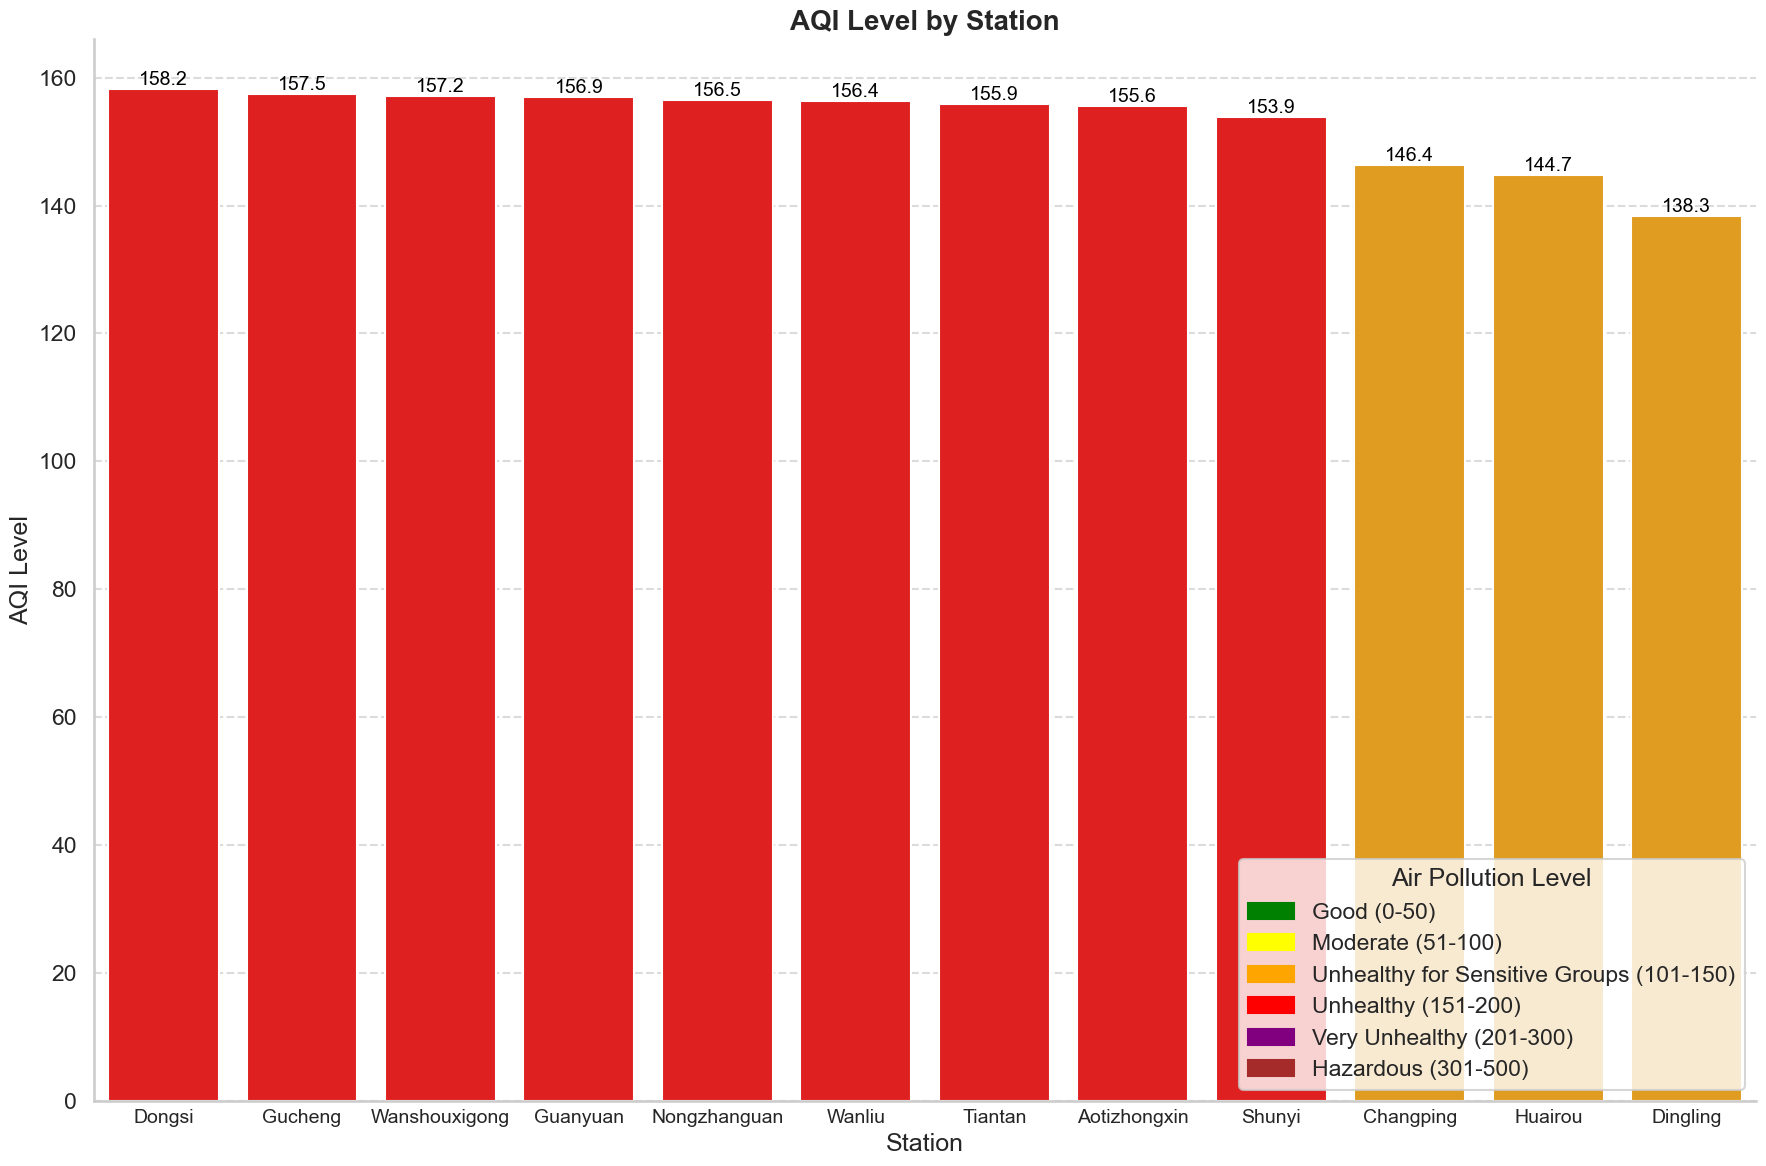

In [61]:
# Set the style of the plot
sns.set_context("talk")
sns.set_style("whitegrid")

# Set the size of the plot
plt.figure(figsize=(18, 12))

# Function to categorize AQI values and return appropriate color
def aqi_color(aqi):
    if aqi <= 50:
        return 'green'  # Good
    elif aqi <= 100:
        return 'yellow'  # Moderate
    elif aqi <= 150:
        return 'orange'  # Unhealthy for Sensitive Groups
    elif aqi <= 200:
        return 'red'  # Unhealthy
    elif aqi <= 300:
        return 'purple'  # Very Unhealthy
    else:
        return 'brown'  # Hazardous


# Create a bar plot for AQI by station with specified colors
barplot = sns.barplot(data=df_districts_grouped, x='station', y='AQI',
                      palette=[aqi_color(aqi) for aqi in df_districts_grouped['AQI']])

# Gives x-axis labels for readability
plt.xticks(ha='center', va='center', fontsize=14)

plt.title('AQI Level by Station', fontsize=20, fontweight='bold')
plt.xlabel('Station', fontsize=18)
plt.ylabel('AQI Level', fontsize=18)


# Create a legend for AQI levels
legend_labels = ['Good (0-50)', 'Moderate (51-100)', 'Unhealthy for Sensitive Groups (101-150)',
                 'Unhealthy (151-200)', 'Very Unhealthy (201-300)', 'Hazardous (301-500)']
legend_colors = ['green', 'yellow', 'orange', 'red', 'purple', 'brown']

# Manually create the legend
handles = [plt.Rectangle((0, 0), 1, 1, color=legend_colors[i])
           for i in range(len(legend_labels))]
plt.legend(handles, legend_labels,
           title="Air Pollution Level", loc='lower right')

# Annotate bars with AQI values
for bar in barplot.patches:
    bar_height = bar.get_height()
    barplot.annotate(f'{bar_height:.1f}',
                     (bar.get_x() + bar.get_width() / 2, bar_height),
                     ha='center', va='bottom', fontsize=14,
                     color='black' if bar_height < 200 else 'white')

plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

plt.tight_layout()
plt.show()

The district with the highest average air pollution level is Dongsi, with an AQI of 158.2, which is categorized as Unhealthy


### Pertanyaan 2: _How do the average levels of air pollutants (PM2.5, PM10, SO2, NO2, and O3) vary by hour of the day and by month, and what are the safe levels for these pollutants?_


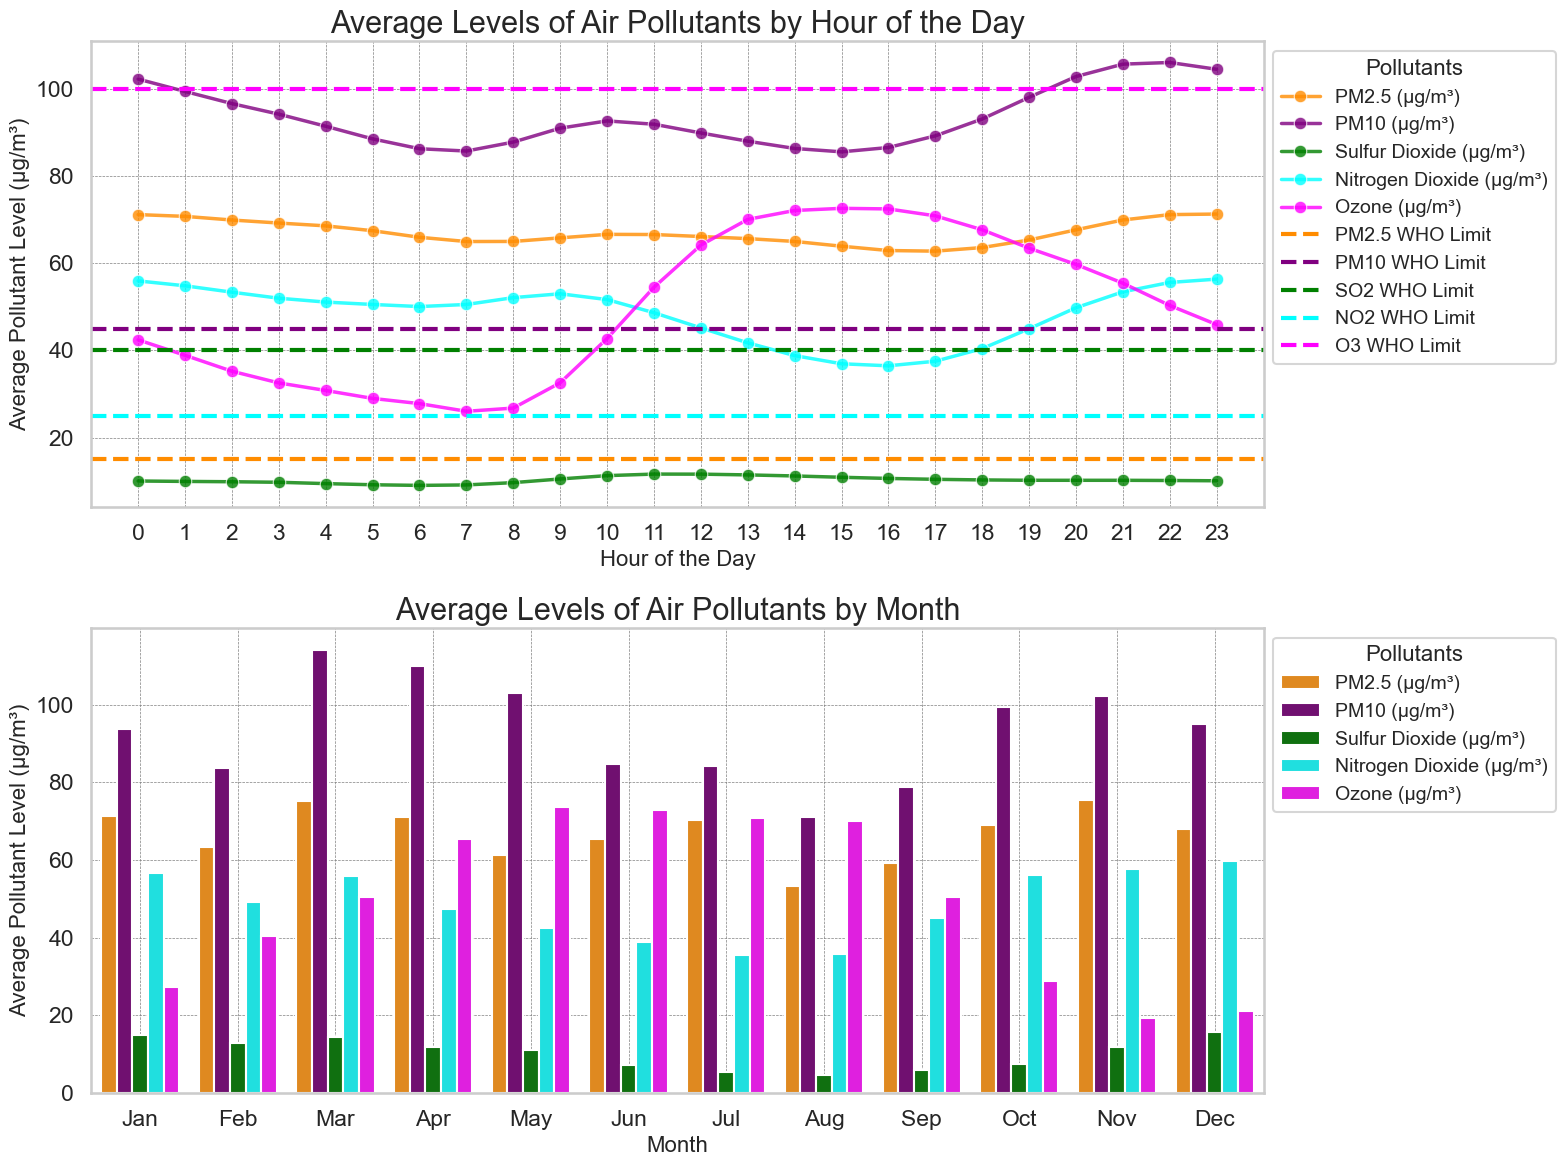

In [62]:
# Adding WHO guideline limits to the hourly plot
who_limits = {
    'PM2.5_mean': 15,
    'PM10_mean': 45,
    'SO2_mean': 40,
    'NO2_mean': 25,
    'O3_mean': 100
}

# Custom palette for the pollutants
palette = {
    'PM2.5_mean': 'darkorange',
    'PM10_mean': 'purple',
    'SO2_mean': 'green',
    'NO2_mean': 'cyan',
    'O3_mean': 'magenta'
}

# Legend labels for pollutants
legend_labels = {
    'PM2.5_mean': 'PM2.5 (µg/m³)',
    'PM10_mean': 'PM10 (µg/m³)',
    'SO2_mean': 'Sulfur Dioxide (µg/m³)',
    'NO2_mean': 'Nitrogen Dioxide (µg/m³)',
    'O3_mean': 'Ozone (µg/m³)'
}

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Hourly Plot: show variation by hour
sns.lineplot(data=avg_pollutants_melted,
             x='hour',
             y='Average Level',
             hue='Pollutant',
             palette=palette,
             marker='o',
             linewidth=2.5,
             alpha=0.8,
             ax=axes[0])

# Draw horizontal lines for WHO limits
for pollutant, limit in who_limits.items():
    axes[0].axhline(y=limit, color=palette[pollutant], linestyle='--',
                    linewidth=3, label=f'{pollutant.split("_")[0]} WHO Limit')

axes[0].set_title(
    'Average Levels of Air Pollutants by Hour of the Day', fontsize=22)
axes[0].set_xlabel('Hour of the Day', fontsize=16)
axes[0].set_ylabel('Average Pollutant Level (µg/m³)', fontsize=16)
axes[0].set_xticks(range(0, 24))
axes[0].set_xlim(-1, 24)

# Update legend handles for hourly plot
handles, labels = axes[0].get_legend_handles_labels()
new_labels = [legend_labels.get(label, label) for label in labels]
axes[0].legend(handles=handles, labels=new_labels, title='Pollutants',
               fontsize=14, title_fontsize='16', loc='upper left', bbox_to_anchor=(1, 1))
axes[0].grid(color='gray', linestyle='--', linewidth=0.5)

# Monthly Plot: show variation by month
sns.barplot(data=avg_pollutants_monthly_melted,
            x='month',
            y='Average Level',
            hue='Pollutant',
            palette=palette,
            ax=axes[1])

unique_months = sorted(avg_pollutants_monthly_melted['month'].unique())
month_labels = [calendar.month_abbr[month] for month in unique_months]

axes[1].set_title('Average Levels of Air Pollutants by Month', fontsize=22)
axes[1].set_xlabel('Month', fontsize=16)
axes[1].set_ylabel('Average Pollutant Level (µg/m³)', fontsize=16)
axes[1].set_xticks(np.arange(len(unique_months)), labels=month_labels)
axes[1].grid(color='gray', linestyle='--', linewidth=0.5)

# Update legend for the monthly plot with same labels
handles, labels = axes[1].get_legend_handles_labels()
new_labels = [legend_labels.get(label, label) for label in labels]
axes[1].legend(handles=handles, labels=new_labels, title='Pollutants',
               fontsize=14, title_fontsize='16', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

Average levels of air pollutants (PM2.5, PM10, SO2, NO2, and O3)

- By Hour of the Day:

  PM2.5 and PM10 levels peak during the morning and evening rush hours, fluctuating slightly but overall remaining consistent. NO2 also tends to peak during these hours due to traffic emissions, while O3 levels often rise later in the day, particularly in the afternoon. In contrast, SO2 remains stable throughout the hours of the day.

- By Month:

  SO2 levels are stable across months. O3 trends has an inverted pattern compared to NO2, PM2.5, and PM10. PM10 shows the largest fluctuations among the pollutants, with a peak observed in March.

Only SO2 and O3 are considered to have levels that are safe, while the others exceed recommended limits.


### **Insight:**

- Air Quality by Station:
  All stations are within the "Unhealthy" AQI range (151-200), with Dongsi having the highest AQI (158.2). Even the lowest AQI, at Dingling (138.3), is still in the "Unhealthy for Sensitive Groups" range, indicating widespread air quality issues across the area.

- Pollutant Trends:
  PM10 and PM2.5 levels rise during morning and evening hours, while Ozone (O3) peaks in the afternoon. Pollution is higher in colder months, likely due to increased heating and poor atmospheric dispersion.

- Sulfur Dioxide (SO2) and Ozone (O3) levels consistently fall within safe limits according to WHO Air Quality Guidelines. However, other pollutants exceed recommended thresholds, signaling a critical need for intervention.

- PM10 levels remain consistently high throughout the year, while Sulfur Dioxide (SO2) levels are consistently low. Other pollutants display significant monthly variability, suggesting the influence of seasonal activities and environmental conditions on air quality.


## Analisis Lanjutan (Opsional)


In [63]:
# Add datetime as index
data2_df = data_df.copy()
data2_df['datetime'] = pd.to_datetime(
    data2_df[['year', 'month', 'day', 'hour']])
data2_df.set_index('datetime', inplace=True)
data2_df.sort_index(inplace=True)
data2_df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,O3,TEMP (C),PRES,DEWP,station
datetime,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,4.0,7.0,77.0,-0.7,1023.0,-18.8,Aotizhongxin
2013-03-01 00:00:00,2013,3,1,0,6.0,6.0,4.0,8.0,81.0,-0.5,1024.5,-21.4,Tiantan
2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,3.0,2.0,82.0,-2.3,1020.8,-19.7,Dingling
2013-03-01 00:00:00,2013,3,1,0,8.0,8.0,6.0,28.0,52.0,-0.7,1023.0,-18.8,Wanliu
2013-03-01 00:00:00,2013,3,1,0,3.0,6.0,13.0,7.0,85.0,-2.3,1020.8,-19.7,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 23:00:00,2017,2,28,23,13.0,16.0,4.0,9.0,74.0,7.0,1009.4,-12.2,Dingling
2017-02-28 23:00:00,2017,2,28,23,20.0,25.0,6.0,28.0,54.0,7.0,1009.4,-12.2,Changping
2017-02-28 23:00:00,2017,2,28,23,19.0,31.0,10.0,79.0,42.0,8.6,1014.1,-15.9,Aotizhongxin


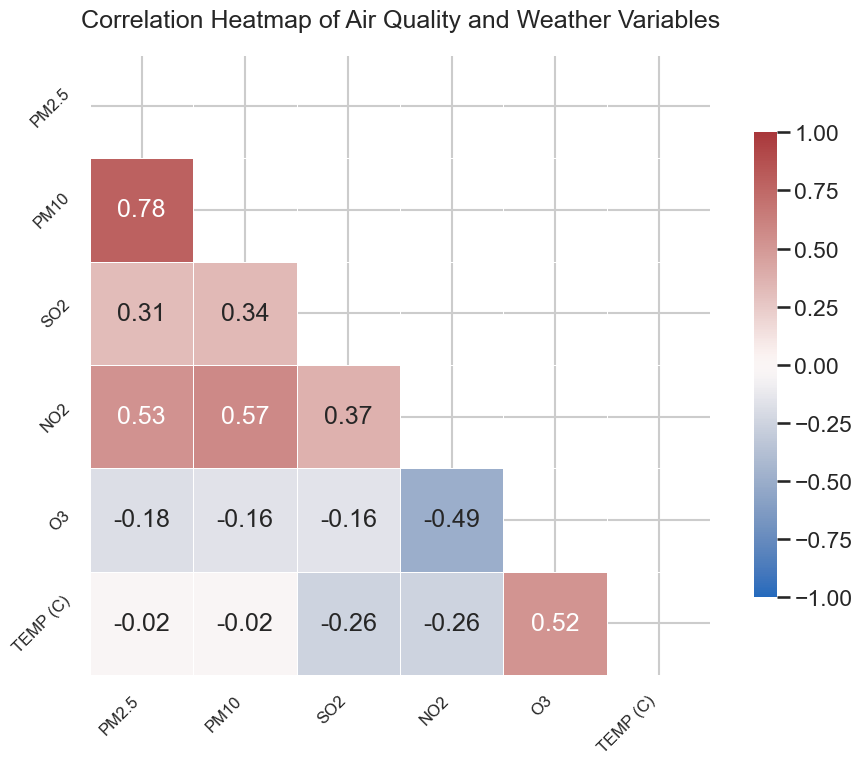

In [64]:
# Compute the correlation matrix
corr_matrix = data2_df[['PM2.5', 'PM10', 'SO2',
                        'NO2', 'O3', 'TEMP (C)']].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='vlag', linewidths=0.5,
            square=True, cbar_kws={"shrink": .75}, vmin=-1, vmax=1)

# Titles and Labels
plt.title('Correlation Heatmap of Air Quality and Weather Variables',
          fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=45, fontsize=12)

# Adjust layout for better fit
plt.tight_layout()
plt.show()

The correlation matrix provides insights into the relationships between various air quality and weather variables. Strong correlations, such as between PM2.5 and PM10, indicate that as one pollutant increases, the other tends to increase as well, while weaker correlations with O3 suggest a more complex relationship with other pollutants.

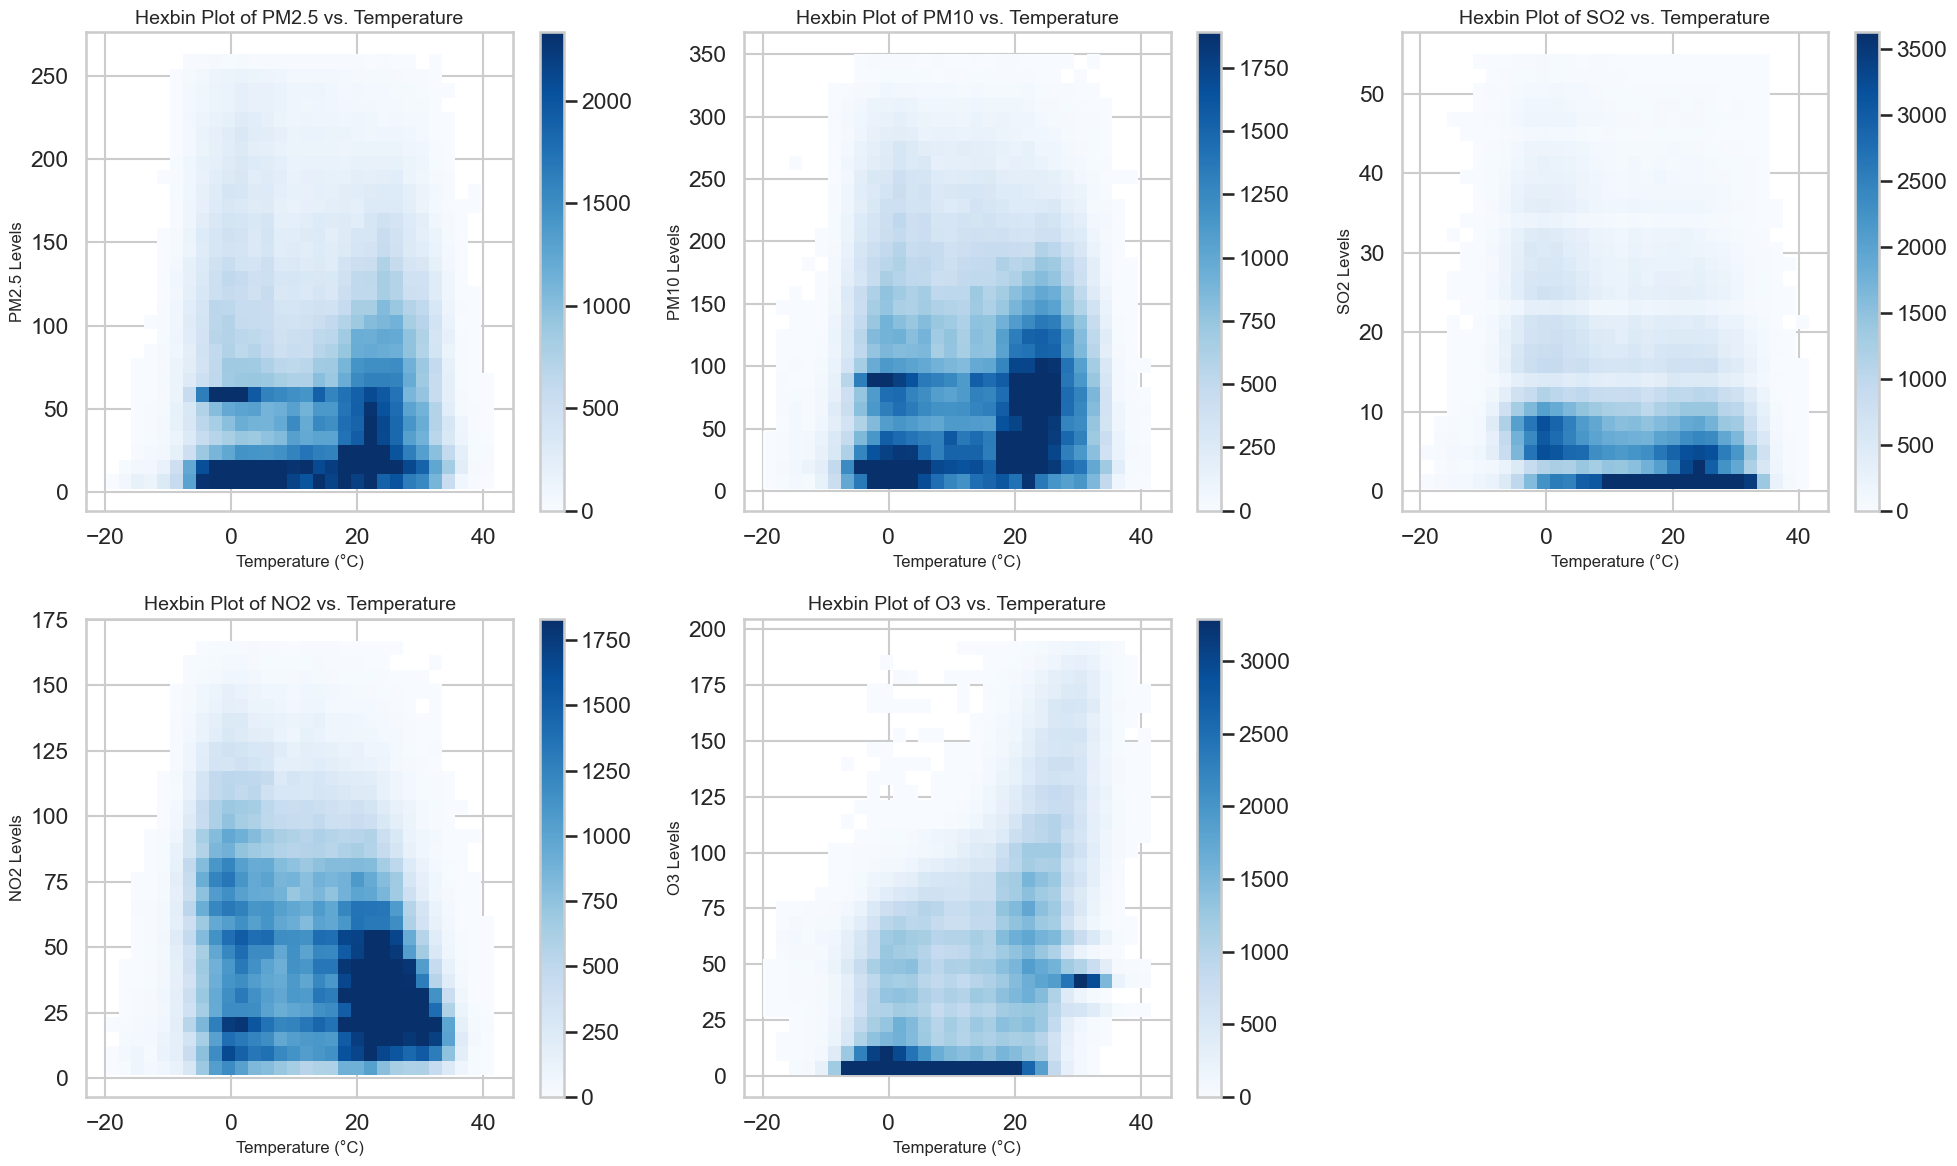

In [65]:
# Create a larger figure for subplots
plt.figure(figsize=(20, 12))

# Loop through pollutants and create subplots
for i, variable in enumerate(data2_df.columns[4:9]):
    plt.subplot(2, 3, i + 1)

    # Create a hexbin plot with seaborn
    sns.histplot(x=data2_df['TEMP (C)'], y=data2_df[variable],
                 bins=30, pmax=0.8, cmap='Blues', cbar=True)

    # Add titles and labels
    plt.title(f'Hexbin Plot of {variable} vs. Temperature', fontsize=14)
    plt.xlabel('Temperature (°C)', fontsize=12)
    plt.ylabel(f'{variable} Levels', fontsize=12)

# Adjust the layout
plt.tight_layout()
plt.show()

Hexbin plots visualize the relationship between temperature and different pollutants. These plots reveal areas of higher concentrations of pollutants at varying temperature levels, O3 display a weaker relationship with temperature compared to other pollutants, while PM10 and NO2 concentrations tend to increase during hotter conditions, indicating their sensitivity to temperature changes.

## Conclusion


### Which station has the highest average air pollution level`s?

The chart uses color coding to indicate air quality levels, ranging from green, indicating "Good" (AQI 0-50), to maroon, representing "Hazardous" (AQI 301-500).

Dongsi has the highest AQI at 158.2, followed closely by Gucheng at 157.5 and Wanshouxi at 157.2, all classified as "Unhealthy." Dingling reports the lowest AQI at 138.3, categorized as "Unhealthy for Sensitive Groups," along with Changping at 146.4 and Huairou at 144.7. Most stations show "Unhealthy" AQI levels, posing health risks, especially for vulnerable populations like children and the elderly. The majority of stations have similar AQI levels around the mid-150s, reflecting consistently unhealthy air quality across various locations. Only a few stations, such as Dingling, Huairou, and Changping, exhibit slightly better air quality, but still represent risks for sensitive groups.


### How do the average levels of air pollutants (PM2.5, PM10, SO2, NO2, and O3) vary by hour of the day and by month, and what are the safe levels for these pollutants?


PM10 and PM2.5 levels peak during morning and evening rush hours, indicating that traffic significantly contributes to higher particulate matter levels. In contrast, SO2 remains stable low throughout the day. NO2 shows a rise after noon, likely due to vehicle emissions, while O3 levels increase in the afternoon, driven by sunlight-driven chemical reactions.

When compared to WHO limits, PM2.5 and PM10 consistently exceeds safe levels even doubling it, posing significant health risks, while NO2 remains close to its upper limit within 5-10 µg/m³ of exceeding the threshold. SO2 and O3 levels, on the other hand, consistently fall within the safe limits outlined by the WHO Air Quality Guidelines.

Monthly trends reveal that particulate matter peaks during dry months and winter due to increased dust and heating, whereas ozone levels are highest in warmer months. All pollutants except PM10 has more stable trends all the months, where SO2 remains in 10 (µg/m³) and NO2, PM2.5, and O3 remains in range of 40 - 60 (µg/m³) with O3 sometimes fluctuate more. PM10 has exceed more through the limit, doubling the pollutant level This analysis underscores seasonal variations in air quality, with particulate matter worsening during dry or cold periods and ozone peaking in sunnier months.


### Other Dicovery


The correlation matrix reveals strong relationships among pollutants, particularly between PM2.5 and PM10, indicating that as one increases, the other tends to increase as well. However, notable exceptions exist, especially concerning O3, which exhibits neutral to negative correlations with other pollutants.

The hexbin plots of pollutants against temperature illustrate an inverse relationship: lower temperatures are associated with higher levels of certain pollutants. This suggests that colder weather may exacerbate air quality issues.

In [66]:
data_df.to_csv('PRSA_Data_stations.csv')